<a href="https://colab.research.google.com/github/michaelkhan3/tensorflow_cert_checklist/blob/plot-loss-and-accuracy/01-build-and-train-models/plot_loss_and_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot loss and training accuracy of trained model

We will how to plot the model's accuracy and loss using [matplotlib](https://matplotlib.org/)



## Train a simple image classification model

For a more detailed explanation of this model go to [Multi-class categorization](/multi-class-categorization.ipynb)

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


multi_class_categorization_model = tf.keras.Sequential([
                                                        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                                        tf.keras.layers.MaxPool2D(2, 2),
                                                        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                                        tf.keras.layers.MaxPool2D(2, 2),
                                                        tf.keras.layers.Flatten(),
                                                        tf.keras.layers.Dense(256, activation='relu'),
                                                        # Final layer has 10 neurons with sofmax activation
                                                        tf.keras.layers.Dense(10, activation='softmax')
])

multi_class_categorization_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    # Use sparse categorical cross entropy loss for multi-class categorization
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history = multi_class_categorization_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 0.4615 - accuracy: 0.8336 - val_loss: 0.3387 - val_accuracy: 0.8766
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3037 - accuracy: 0.8881 - val_loss: 0.3059 - val_accuracy: 0.8899
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2573 - accuracy: 0.9062 - val_loss: 0.2856 - val_accuracy: 0.8933
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2263 - accuracy: 0.9159 - val_loss: 0.2627 - val_accuracy: 0.9008
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.2417 - val_accuracy: 0.9094
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1737 - accuracy: 0.9348 - val_loss: 0.2419 - val_accuracy: 0.9110
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1557 - ac

## Create plots

### Extract values from history

Extract the variables we want to plot from the `history` object.

In [3]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs=history.epoch

In [10]:
import matplotlib.pyplot as plt

### Using Seaborn style

By importing Seaborn and calling `set()` we can easily make the plot look nicer.

__Note:__ this step is not necessary

In [14]:
import seaborn as sns
sns.set()

### Plot losses

Plot the training and validation loss

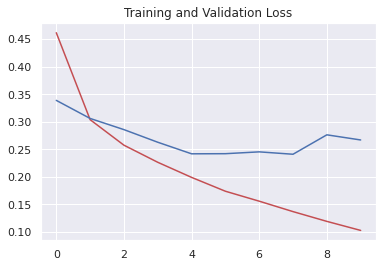

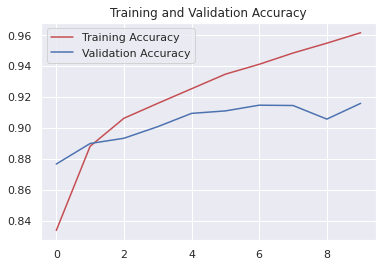

In [15]:
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")

plt.figure()

plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()